In [4]:
import numpy as np
from numpy import linalg as LA
from matplotlib.pyplot import *
import scipy.integrate as INT
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [353]:
def db_heaviside(X, rho):
    heav = np.zeros_like(X)
    for i in xrange(len(X[:,0])):
        for j in xrange(len(X[0,:])):
            if abs(X[i,j]) <= rho:
                heav[i,j] = 1.
            else:
                heav[i,j] = 0.
    return heav

def potencial_num(X, Y, v0, rho):
    V = np.zeros_like(X)
    for n in range(-3,3):
        V = v0*db_heaviside(X, rho[0])*db_heaviside(Y, rho[1])
    return V

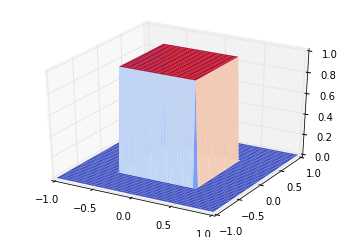

In [356]:
x, y = np.linspace(-1,1,50), np.linspace(-1,1,50)
rho = [0.5,0.5]
v0 = 1.
X, Y = np.meshgrid(x, y)
V = potencial_num(X, Y, v0, rho)

fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

In [357]:
def basis(N):
    base = np.zeros(((2*N[0]+1)*(2*N[1]+1),2))
    c = -1
    for i in xrange(-N[0],N[0]+1):
        for j in xrange(-N[1],N[1]+1):
            c += 1
            base[c] = [i,j]
    return base



def potencial(x, y, args):
    v = 0
    for n in range(-3,3):
        v+= v0*db_heaviside(X, rho[0])*db_heaviside(Y, rho[1])
    return v

def potencial_func_base(x, y, n, m, args):
    base = basis(N)
    return potencial(x,y, args)*np.exp(-2.0j*np.pi*(base[n][0]-base[m][0])*x)*np.exp(-2.0j*np.pi*(base[n][1]-base[m][1])*y)


def Potencial_numeric(N, a, args):
    M = (2*N[0]+1)*(2*N[1]+1)
    v_nm = np.zeros((M, M), dtype=np.complex64)
    
    for n in xrange(M):
        for m in range(M): 
            I = nquad(potencial_func_base, [[-a[0], a[0]],[-a[1],a[1]]], args=(n, m, args))[0]
            v_nm[m,n] = I
            v_nm[n,m] = I
    return v_nm

def Hamiltonian_numeric(N, K, a, args):
    M = (2*N[0]+1)*(2*N[1]+1)
    h = np.zeros((M, M), dtype=np.complex64)
    base = basis(N)
    for n in xrange(M):
        for m in xrange(M):
            if n == m:
                h[n,m] = (2*base[n][0]+K[0])**2 + (a[0]*(2*base[n][1]+K[1])/a[1])**2
                
    h = h + Potencial_numeric(N, a, args)
    return h

In [360]:
Hamiltonian_numeric([1,1], [0,0], [1,1],0)

array([[ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]])

In [7]:
? INT.nquad